## Simple Linear Regression [Engine Size vs CO2 Emmisions]

### Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Download dataset

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load data

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Explore data

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Select Features

In [5]:
cdf = df[['ENGINESIZE', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


### Plot a scatter plot to observe the relationship between X and Y

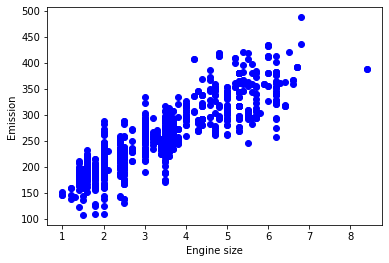

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

The relationship appears to be linear

### Splitting dataset into train (80%) and split

In [7]:
mask = np.random.rand(len(cdf)) < 0.8
train = cdf[mask]
test = cdf[~mask]

### Model: Simple Linear Regression (y=mx+c)

In [8]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

Train data

In [9]:
trainX = np.asanyarray(train[['ENGINESIZE']])
trainY = np.asanyarray(train[['CO2EMISSIONS']])

Fit model

In [10]:
regression.fit(trainX, trainY)

LinearRegression()

### Print Results

In [11]:
print(f'Coefficient: {regression.coef_}')
print(f'Intercept: {regression.intercept_}')

Coefficient: [[39.38369371]]
Intercept: [125.05894949]


### Plot results

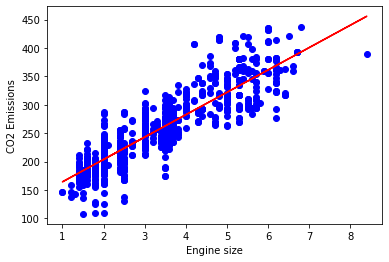

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')

plt.plot(trainX, regression.coef_[0][0]*trainX + regression.intercept_[0], '-r')
plt.show()

### Evaluation

In [13]:
from sklearn.metrics import r2_score

testX = np.asanyarray(test[['ENGINESIZE']])
testY = np.asanyarray(test[['CO2EMISSIONS']])

testY_ = regression.predict(testX)

print(f'Mean absolute error: {np.mean(np.absolute(testY_ - testY))}')
print(f'Residual sum of squares (MSE): {np.mean((testY_ - testY) ** 2)}')
print(f'R2-Score: {r2_score(testY , testY_)}')

Mean absolute error: 23.326522489383386
Residual sum of squares (MSE): 965.3954465423134
R2-Score: 0.7547094055952906


### Training with test dataset

In [14]:
regression.fit(testX, testY)

LinearRegression()

### Pickling

In [15]:
from pickle import dump

with open('slrCO2Emissions.pkl', 'wb') as f:
    dump(regression, f)
